In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from numpy.linalg import matrix_rank, inv
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


%matplotlib inline
sns.set(style="ticks", rc={'figure.figsize':(8,7)})
sns.set_palette('colorblind');

np.set_printoptions(precision=4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

Colinearity when 2 features are heavily correlated with each other. Use heatmap to see which 2 features are heavily correlated with each other and keep 1 of them. However multicolinearity is a more difficult problem to solve, wherein multiple features may be correlated to 1 particular feature and thus removing multicolinearity in case of linear regression is a difficult challenge.

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

### Variance Inflation factor (VIF) 
The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

VIFs are calculated by taking a predictor, and regressing it against every other predictor in the model. This gives you the R-squared values, which can then be plugged into the VIF formula. “i” is the predictor you’re looking at (e.g. $x_1$ or $x_2$):

$$ VIF = \frac{1}{1 - R_i^{2}} $$

#### Interpreting the Variance Inflation Factor

Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors.

A rule of thumb for interpreting the variance inflation factor:
- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.

Exactly how large a VIF has to be before it causes issues is a subject of debate. What is known is that the more your VIF increases, the less reliable your regression results are going to be. In general, a VIF above 10 indicates high correlation and is cause for concern. Some authors suggest a more conservative level of 2.5 or above.

Sometimes a high VIF is no cause for concern at all. For example, you can get a high VIF by including products or powers from other variables in your regression, like x and x2. If you have high VIFs for dummy variables representing nominal variables with three or more categories, those are usually not a problem.

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = boston["data"]  # all the feature data
Y = boston["target"]  # target variable
names = list(boston["feature_names"])  # all column names

In [5]:
inp_df = pd.DataFrame(X, columns=names)   # only the feature columns here

In [6]:
inp_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


So idea of VIF is we take one column in one iteration as my target variable and the remaining columns as feature variables. And then fit a linear regression on it calculate the $R^2$ vale and then calculate $$ vif = \frac{1}{1-R_i^2} $$

So in 1st iteration __CRIM__ is the target variable and rest of the columns will be features and then we will fit the linear regression and we will calculate vif for each column as target variable.

In [7]:
for i in range(0, len(names)):
    y = inp_df.loc[:, inp_df.columns == names[i]]
    x = inp_df.loc[:, inp_df.columns != names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names[i], vif)
        )

R Square value of CRIM column is 0.52 keeping all other columns as features
Variance Inflation Factor of CRIM column is 2.1 

R Square value of ZN column is 0.65 keeping all other columns as features
Variance Inflation Factor of ZN column is 2.84 

R Square value of INDUS column is 0.93 keeping all other columns as features
Variance Inflation Factor of INDUS column is 14.49 

R Square value of CHAS column is 0.13 keeping all other columns as features
Variance Inflation Factor of CHAS column is 1.15 

R Square value of NOX column is 0.99 keeping all other columns as features
Variance Inflation Factor of NOX column is 73.89 

R Square value of RM column is 0.99 keeping all other columns as features
Variance Inflation Factor of RM column is 77.95 

R Square value of AGE column is 0.95 keeping all other columns as features
Variance Inflation Factor of AGE column is 21.39 

R Square value of DIS column is 0.93 keeping all other columns as features
Variance Inflation Factor of DIS column is 

Higher the VIF more the chances of it being removed from the linear regression model.

Eg:

> R Square value of RM column is 0.99 keeping all other columns as features.  
Variance Inflation Factor of RM column is 77.95 

RM column can be explained as a combination of multiple other columns or multiple other features. So RM column can be neglected while creating a linear regression model.

__Similarly higher the values of VIF, the more are the chances that you can drop it off when you build a linear rgeression model.__

***
### __Aim__ 
To show multicolinearity is bad for regression

__Helper functions Used to optimise the code:__

In [8]:
def pretty_print_linear(coefs, name = None, sort = False):
    """
    Prints out the feature name along with the coefficient that the linear regression has calculated.
    """
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x: -np.abs(x[0]))
    
    return(" + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst))

In [9]:
def plot_correlation(df, numerical_feature_columns, target, k):
    '''
    Takes in dataframe with input feature columns and finds it correaltion with target variable column and target variable is 
    also in the numerical_feature_columns.
    '''
    cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
    cm = df[cols].corr()
    plt.figure(figsize = (10,6))
    return(sns.heatmap(cm, annot = True, cmap = 'viridis'))

In [10]:
def fit_ols(X,y):
    """
    Fitting the dataframe X and y on the OLS, generate summary, adjusted Rsq and Rsq
    """
    model = sm.OLS(y,X)
    results = model.fit()
    print('R2: ', results.rsquared)  # Rsq
    print('AdjustedR2: ', results.rsquared_adj)  # Adjusted Rsq
    return(results.summary())

In [11]:
def generate_vif(df, target):
    X_var = add_constant(df.loc[:, df.columns!=target])
    return(pd.Series(
        [variance_inflation_factor(X_var.values, i) for i in range(X_var.shape[1])], index=X_var.columns
    ))

In [12]:
def generate_x_y_numeric_target(df, target):
    numerical_features_columns = list(df._get_numeric_data().columns)
    X = df.loc[:, df.columns != target]
    y = df.loc[:, df.columns == target]
    return(numerical_features_columns, X, y)

In [13]:
df = pd.read_csv("inp_data.csv")
df.head()

,x1,x2,x3,y
0,100,110,40,3.9000
1,95,110,40,2.6000
2,90,120,30,2.7000
3,85,110,40,3.0000
4,80,100,20,2.4000


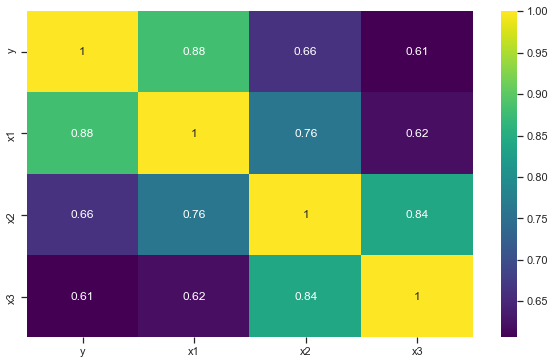

In [14]:
target = 'y'
numeric_cols, X, y = generate_x_y_numeric_target(df, target)
plot_correlation(df, numeric_cols, target, 5)

Heavy correlation of x1 and target variable y i.e, 0.88. Also, x1 is also highly correlated to x2. So no point in retaining both x1 and x2.

Before that lets look at the summary that is  genrated for the models made using these columns.

[Important OLS](https://stackoverflow.com/a/30651065)

In [15]:
fit_ols(X,y)

R2:  0.9864408944621423
AdjustedR2:  0.9806298492316319


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              169.8
Date:                Wed, 06 May 2020   Prob (F-statistic):                    6.72e-07
Time:                        18:42:05   Log-Likelihood:                         -1.9021
No. Observations:                  10   AIC:                                      9.804
Df Residuals:                       7   BIC:                                      10.71
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0405      0.012      3.420      0.011       0.012       0.068
x2            -0.0093      0.009     -0.997      0.352      -0.031       0.013
x3             0.0090      0.009      0.982      0.359      -0.013       0.031
==============================================================================
Omnibus:                        0.439   Durbin-Watson:                   2.500
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.131
Skew:                          -0.234   Prob(JB):                        0.937
Kurtosis:                       2.692   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__1st and foremost way__ to assess multicolinearity is assessing the coefficients. 

x1 = 0.0405  
x2 = -0.0093  
x3 = -0.0090  

x2 has a negative coefficient even thought all the correlation values are positive as shown in heatmap. Thus signifying there is a significant amount of multicolinearity present in the dataset. 

__How negative coefficient imply presence of multicolinearity?__  

__2nd indication:__ Very high R-squared value. 0.986

__3rd indication:__    
Also, `Prob (F-statistic):	6.72e-07` is highly significant as less than 0.05. But the individual significant levels are not significant 

| Columns | P>\|t\| |
|---------|---------|
| x1      | 0.011   |
| x2      | 0.352   |
| x3      | 0.359   |

x2 and x3 has P-value > 0.05. 

__4th way__ is by finding out VIF. Any value higher than 5 is considered to be having high amount of multicolinearity.

In [16]:
print(generate_vif(df, target))

const   135.8716
x1        2.3842
x2        5.0279
x3        3.4412
dtype: float64


x1 and x3 have decent enough vif as denoted by its value 2.38 and 3.44. But x2 has vif of 5.02 so the coefficients generated might be prone to more errors. 

#### Other type of multicolinearity

If we can express one feature as a combination of ultiple other features in your dataset. But this again destroys assumption of independance of features in linear regression.

In [17]:
df['x4'] = df['x1'] + df['x2'] + df['x3']
df

,x1,x2,x3,y,x4
0,100,110,40,3.9000,250
1,95,110,40,2.6000,245
2,90,120,30,2.7000,240
3,85,110,40,3.0000,235
4,80,100,20,2.4000,200
5,75,110,40,2.2000,225
6,70,90,0,2.1000,160
7,65,110,40,2.1000,215
8,60,80,10,1.5000,150
9,55,80,10,1.8000,145


Again plot the correlation metrix and lest focus only on  the x4 correlation features for now.

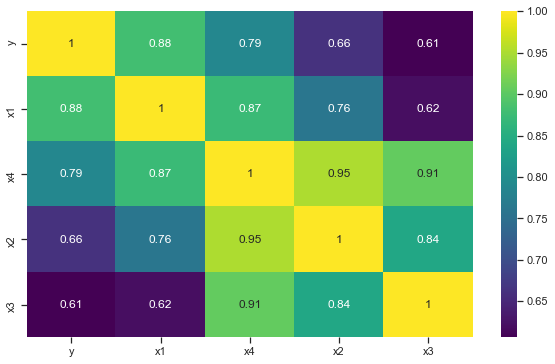

In [18]:
target = 'y'
numeric_cols, X, y = generate_x_y_numeric_target(df, target)
plot_correlation(df, numeric_cols, target, 5)

So x4 has high correlation with x1, x2 and x3.

In [19]:
print(fit_ols(X,y))

R2:  0.9864408944621423
AdjustedR2:  0.9806298492316319
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              169.8
Date:                Wed, 06 May 2020   Prob (F-statistic):                    6.72e-07
Time:                        18:42:13   Log-Likelihood:                         -1.9021
No. Observations:                  10   AIC:                                      9.804
Df Residuals:                       7   BIC:                                      10.71
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.0

Also, `Prob (F-statistic):	6.72e-07` is highly significant as less than 0.05. But the individual significant levels are not significant 

| Columns | P>\|t\| |
|---------|---------|
| x1      | 0.031   |
| x2      | 0.108   |
| x3      | 0.899   |
| x4      | 0.001   |

So there is multi colinearity in the dataset.

Now when we claculate the VIFs:

In [20]:
print(generate_vif(df, target))

const   135.8716
x1           inf
x2           inf
x3           inf
x4           inf
dtype: float64


The values are infinity i.e, heavy multicolinearity in data.

#### Why multicolinearity impacts linear and logistic regression but not other models such as decison tree, random forest? 

Reason simply lies in the way weights are computed in linear or logistic regression using OLS.

Weights eqn in OLS

$$ \hat{Y}=\hat{\beta_0}+\hat{\beta_1}X_1+\hat{\epsilon_1}  $$

$$ \hat{\beta_1}=(X^TX)^{-1}X^TY $$



In [21]:
covariance_matrix = np.dot(X.T,X)
print(covariance_matrix)  # as 4 features so 4x4 matrix

[[ 62125  80500  22250 164875]
 [ 80500 105800  29200 215500]
 [ 22250  29200   9500  60950]
 [164875 215500  60950 441325]]


If u feel there is a linear relatonship between features in the model that u will be making using linear regression one way to assess if there is a multicolinearity there or not is by finding out the rank of the covaraince matrix.

> __The rank of a covariance matrix indicates how many independant features we have in our matrix.__

Here we have 4 features so a rank of 4 in the 4x4 covaraince matrix indicates that we have 4 independant features.

In [22]:
matrix_rank(covariance_matrix)

3

So we have 3 as rank so overall we have 3 variables which are independant of each other the 4th one depends on the previous 3 features. And if we try to find the inverse of a matrix which has rank less than the number of features/columns in the covariance matrix we will get an error.

![](cov_inv.PNG)

In [23]:
inverse_covaraince_matrix = inv(covariance_matrix)

In [24]:
inverse_covaraince_matrix

array([[ 2.1817e+11,  2.1817e+11,  2.1817e+11, -2.1817e+11],
       [ 2.1817e+11,  2.1817e+11,  2.1817e+11, -2.1817e+11],
       [ 2.1817e+11,  2.1817e+11,  2.1817e+11, -2.1817e+11],
       [-2.1817e+11, -2.1817e+11, -2.1817e+11,  2.1817e+11]])

Dont know why we are not getting an error here maybe because of different versions.



So going back to our qtn why regression is affcted by multicolinearity waht OLS will do internally it will scale the data and later use it to compute weights which would be misleading in nature.

So lets pick 2 features which are not linearly dependant on each other.

In [25]:
X

,x1,x2,x3,x4
0,100,110,40,250
1,95,110,40,245
2,90,120,30,240
3,85,110,40,235
4,80,100,20,200
5,75,110,40,225
6,70,90,0,160
7,65,110,40,215
8,60,80,10,150
9,55,80,10,145


In [26]:
X_sliced = X.loc[:,['x1', 'x2']]
covariance_matrix = np.dot(X_sliced.T, X_sliced)
print(covariance_matrix)

[[ 62125  80500]
 [ 80500 105800]]


In [27]:
matrix_rank(covariance_matrix)

2

In [29]:
inverse_covaraince_matrix = inv(covariance_matrix)
weights = np.dot(np.dot(inverse_covaraince_matrix, X_sliced.T), y)
print (weights)

[[ 0.0408]
 [-0.0071]]


In [30]:
print(fit_ols(X_sliced,y))

R2:  0.9845745127224006
AdjustedR2:  0.9807181409030008
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              255.3
Date:                Wed, 06 May 2020   Prob (F-statistic):                    5.66e-08
Time:                        18:43:17   Log-Likelihood:                         -2.5469
No. Observations:                  10   AIC:                                      9.094
Df Residuals:                       8   BIC:                                      9.699
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.0

High R-squared values.

And if we look at the coefficients


x1     |          0.0408      
x2     |         -0.0071 


They are same as the weights:

[[ 0.0408]
 [-0.0071]]
 
 Also if we look at the P-values:  
 x1 = 0.009  
 x2 = -0.456 > 0.05   as some amount of correaltion was there between x1 and x2 so it was not completely significant. But yes we can verify how OLS computes weights and why in case of multicolinearity it fails to give out right values of weights for particular features.
 
***
